<a href="https://colab.research.google.com/github/Natali-bali/TensorFlow_Tutorial/blob/master/03_CNN_multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project i will do multiple class classification of food photos with 9 classes, dataset from tutorial 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras import preprocessing
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
from os import walk, listdir
from tensorflow.keras import backend as K
import random

### Download and unzip files

In [ ]:
import zipfile

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

--2021-06-15 11:08:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.250.141.128, 2607:f8b0:4023:c06::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   235MB/s    in 2.1s    

2021-06-15 11:08:42 (235 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [ ]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip')
zip_ref.extractall()
zip_ref.close()

### Inspect directories

In [ ]:
for dirpath, dirnames, filenames in walk('/content/10_food_classes_all_data'):
  print(f'There are {len(dirnames)} directories, {len(filenames)} files in {dirpath}')

There are 2 directories, 0 files in /content/10_food_classes_all_data
There are 10 directories, 0 files in /content/10_food_classes_all_data/test
There are 0 directories, 250 files in /content/10_food_classes_all_data/test/sushi
There are 0 directories, 250 files in /content/10_food_classes_all_data/test/fried_rice
There are 0 directories, 250 files in /content/10_food_classes_all_data/test/ramen
There are 0 directories, 250 files in /content/10_food_classes_all_data/test/chicken_curry
There are 0 directories, 250 files in /content/10_food_classes_all_data/test/pizza
There are 0 directories, 250 files in /content/10_food_classes_all_data/test/chicken_wings
There are 0 directories, 250 files in /content/10_food_classes_all_data/test/grilled_salmon
There are 0 directories, 250 files in /content/10_food_classes_all_data/test/steak
There are 0 directories, 250 files in /content/10_food_classes_all_data/test/ice_cream
There are 0 directories, 250 files in /content/10_food_classes_all_data/t

### Get classes names

In [ ]:
import pathlib
data_dir = pathlib.Path('/content/10_food_classes_all_data/test')
classes_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(classes_names, len(classes_names))

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi'] 10


### Inspect random pictures

In [ ]:
def plot_pictures(path):
  dir_names = listdir(path)
  print(len(dir_names))
  plt.figure(figsize=(10,10))
  for dir_name, num in zip(dir_names, range(len(dir_names))):
    files_names = listdir(f'{path}/{dir_name}')
    random_img = preprocessing.image.load_img(f'{path}/{dir_name}/{random.choice(files_names)}')
    plt.subplot(3,4,num+1)
    plt.imshow(random_img)
    plt.title(dir_name)
    plt.axis('off')

10


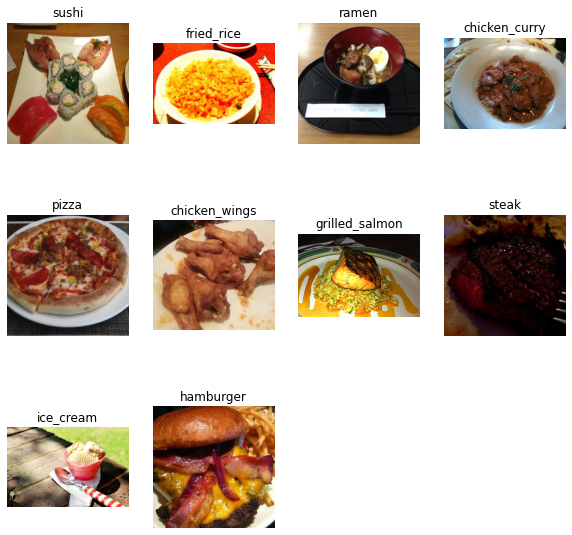

In [ ]:
plot_pictures('/content/10_food_classes_all_data/test')

### Download Train and Test data

In [ ]:
train_datagen = preprocessing.image.ImageDataGenerator(rescale = 1/255.0)
test_datagen = preprocessing.image.ImageDataGenerator(rescale = 1/255.0)

In [ ]:
train_data = train_datagen.flow_from_directory('/content/10_food_classes_all_data/train', 
                                               target_size=(256,256),
                                               class_mode = 'categorical',
                                               seed = 42)
test_data = test_datagen.flow_from_directory('/content/10_food_classes_all_data/test',
                                             target_size=(256, 256),
                                             class_mode = 'categorical',
                                             seed = 42)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
images, labels = train_data.next()
images.shape, labels.shape

((32, 256, 256, 3), (32, 10))

In [ ]:
len(train_data)

235

In [ ]:
labels[0] #Labels already one hot encoded

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Build baseline model

In [ ]:
K.clear_session()
tf.random.set_seed(42)

In [ ]:
model_1 = keras.Sequential([Conv2D(10, 3, activation='relu', input_shape=(256, 256, 3)),
                            Conv2D(10, 3, activation='relu'),
                            MaxPool2D(),
                            Conv2D(10, 3, activation='relu'),
                            Conv2D(10, 3, activation='relu'),
                            MaxPool2D(),
                            Flatten(),
                            Dense(10, activation='softmax')
])

In [ ]:
model_1.compile(optimizer=Adam(), metrics=['accuracy'], loss = CategoricalCrossentropy())

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 122, 122, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 37210)             0

In [ ]:
history_1 = model_1.fit(train_data, 
            epochs = 5, 
            validation_data = test_data, 
            steps_per_epoch = len(train_data),
            validation_steps = len(test_data)
            )

Epoch 1/5
235/235 [==============================] - 46s 195ms/step - loss: 2.1953 - accuracy: 0.1925 - val_loss: 2.0392 - val_accuracy: 0.2652
Epoch 2/5
235/235 [==============================] - 45s 194ms/step - loss: 1.9064 - accuracy: 0.3388 - val_loss: 1.8981 - val_accuracy: 0.3464
Epoch 3/5
235/235 [==============================] - 45s 193ms/step - loss: 1.5030 - accuracy: 0.4929 - val_loss: 1.9167 - val_accuracy: 0.3452
Epoch 4/5
235/235 [==============================] - 45s 193ms/step - loss: 0.8355 - accuracy: 0.7271 - val_loss: 2.6386 - val_accuracy: 0.2980
Epoch 5/5
235/235 [==============================] - 45s 191ms/step - loss: 0.2406 - accuracy: 0.9339 - val_loss: 3.4759 - val_accuracy: 0.3028


In [ ]:
def plot_loss_curves(history):
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  train_accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))

  #Plot Loss
  plt.plot(epochs, train_loss, label = 'Training Loss')
  plt.plot(epochs, val_loss, label = 'Validation Loss')
  plt.title('Loss')
  plt.xlabel('epochs')
  plt.legend()

  #Plot Accuracy
  plt.figure()
  plt.plot(epochs, train_accuracy, label = 'Training Accuracy')
  plt.plot(epochs, val_accuracy, label = 'Validation Accuracy')
  plt.title('Accuracy')
  plt.xlabel('epochs')
  plt.legend()

### Evaluate model

In [ ]:
model_1.evaluate(test_data)

   4576/Unknown - 619s 135ms/step - loss: 3.4951 - accuracy: 0.3004

KeyboardInterrupt: ignored

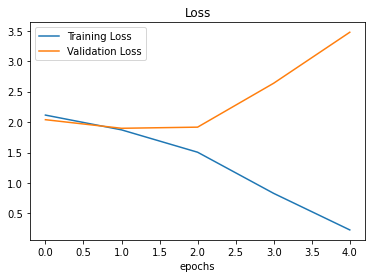

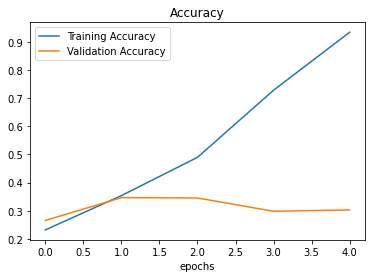

In [ ]:
plot_loss_curves(history_1)

We can see that our model is overfitting


To reduce overfitting:
- Add Data augmentation
- Add regularisation layers(MaxPool2D)
- Add more data
- Reduce comlicity (less hidden layers)

In [ ]:
#Simplify Model
K.clear_session()
tf.random.set_seed(42)

In [ ]:
model_2 = keras.Sequential([Conv2D(10,3,input_shape = (256,256,3), activation = 'relu'),
                            MaxPool2D(),
                            Flatten(),
                            Dense(10, activation = 'softmax')])

In [ ]:
model_2.compile(optimizer=Adam(), loss = CategoricalCrossentropy(), metrics = ['accuracy'])

In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 10)      280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 10)      0         
_________________________________________________________________
flatten (Flatten)            (None, 161290)            0         
_________________________________________________________________
dense (Dense)                (None, 10)                1612910   
Total params: 1,613,190
Trainable params: 1,613,190
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_2 = model_2.fit(train_data, epochs = 5, validation_data=test_data, steps_per_epoch=len(train_data), validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 43s 183ms/step - loss: 4.1872 - accuracy: 0.1934 - val_loss: 1.9631 - val_accuracy: 0.3152
Epoch 2/5
235/235 [==============================] - 43s 186ms/step - loss: 1.4985 - accuracy: 0.5251 - val_loss: 1.9987 - val_accuracy: 0.3064
Epoch 3/5
235/235 [==============================] - 43s 183ms/step - loss: 0.7413 - accuracy: 0.8182 - val_loss: 2.2419 - val_accuracy: 0.2940
Epoch 4/5
235/235 [==============================] - 43s 182ms/step - loss: 0.2531 - accuracy: 0.9601 - val_loss: 2.3998 - val_accuracy: 0.3024
Epoch 5/5
235/235 [==============================] - 43s 182ms/step - loss: 0.0862 - accuracy: 0.9921 - val_loss: 2.6655 - val_accuracy: 0.3164


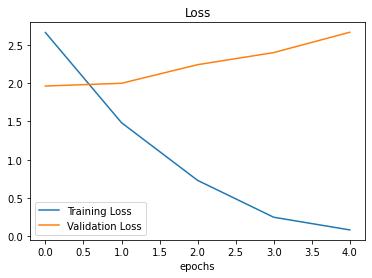

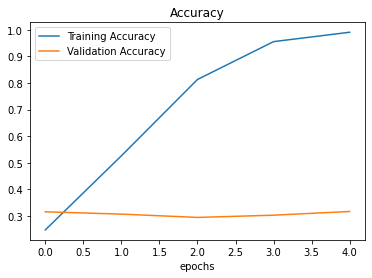

In [ ]:
plot_loss_curves(history_2)

In [ ]:
# Try data augmentation with first model_1
train_datagen_aug = preprocessing.image.ImageDataGenerator(rescale = 1/255.0, 
                                                           rotation_range = 0.2,
                                                           width_shift_range = 0.2,
                                                           height_shift_range = 0.2,
                                                           shear_range = 0.2)

In [ ]:
train_data_aug = train_datagen_aug.flow_from_directory('/content/10_food_classes_all_data/train', 
                                               target_size=(256,256),
                                               class_mode = 'categorical',
                                               seed = 42)
test_data_aug = test_datagen.flow_from_directory('/content/10_food_classes_all_data/test', 
                                               target_size=(256,256),
                                               class_mode = 'categorical',
                                               seed = 42)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
K.clear_session()
tf.random.set_seed(42)

In [ ]:
#We can also use clone_model
#model_3 = keras.models.clone_model(model_1)

In [ ]:
model_3 = keras.Sequential([Conv2D(10, 3, activation='relu', input_shape=(256, 256, 3)),
                            Conv2D(10, 3, activation='relu'),
                            MaxPool2D(),
                            Conv2D(10, 3, activation='relu'),
                            Conv2D(10, 3, activation='relu'),
                            MaxPool2D(),
                            Flatten(),
                            Dense(10, activation='softmax')
])

In [ ]:
model_3.compile(optimizer=Adam(), metrics=['accuracy'], loss = CategoricalCrossentropy())

In [ ]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 10)      280       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 252, 252, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 126, 10)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 124, 124, 10)      910       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 122, 122, 10)      910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 61, 61, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 37210)            

In [ ]:
history_3 = model_3.fit(train_data_aug, 
            epochs = 10, 
            validation_data = test_data, 
            steps_per_epoch = len(train_data_aug),
            validation_steps = len(test_data)
            )

Epoch 1/10
235/235 [==============================] - 123s 518ms/step - loss: 2.2840 - accuracy: 0.1327 - val_loss: 2.0673 - val_accuracy: 0.2652
Epoch 2/10
235/235 [==============================] - 120s 513ms/step - loss: 2.0905 - accuracy: 0.2686 - val_loss: 1.8913 - val_accuracy: 0.3448
Epoch 3/10
235/235 [==============================] - 121s 515ms/step - loss: 1.9689 - accuracy: 0.3042 - val_loss: 1.8551 - val_accuracy: 0.3696
Epoch 4/10
235/235 [==============================] - 122s 522ms/step - loss: 1.9254 - accuracy: 0.3346 - val_loss: 1.7245 - val_accuracy: 0.4112
Epoch 5/10
235/235 [==============================] - 122s 522ms/step - loss: 1.8700 - accuracy: 0.3463 - val_loss: 1.8099 - val_accuracy: 0.3632
Epoch 6/10
235/235 [==============================] - 121s 517ms/step - loss: 1.8454 - accuracy: 0.3674 - val_loss: 1.6923 - val_accuracy: 0.4124
Epoch 7/10
235/235 [==============================] - 120s 511ms/step - loss: 1.8010 - accuracy: 0.3743 - val_loss: 1.6535 -

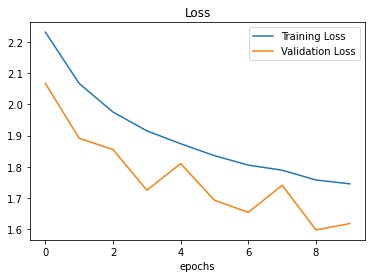

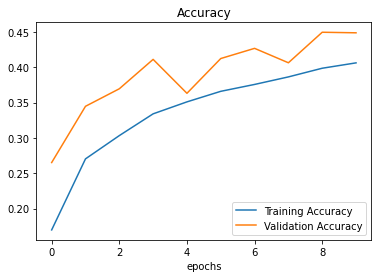

In [ ]:
plot_loss_curves(history_3)

After manipulations with input data our loss and accuracy curves get close to each other. We can run more epochs to increase accuracy


### Make predictions

In [ ]:
def load_and_prep_image(path = '/content/03-steak.jpeg', img_size = (224,224)):
  img = preprocessing.image.load_img(path)
  plt.imshow(img)
  plt.axis(False)
  img = preprocessing.image.img_to_array(img)
  img = preprocessing.image.smart_resize(img,img_size)
  img = img/255.0
  img = tf.expand_dims(img, axis = 0)
  return img

In [ ]:
def load_and_pred(model, path, class_names = classes_names):
  img = load_and_prep_image(path = path, img_size = (256,256))
  pred = model.predict(img)
  print(f'Prediction: {class_names[pred[0].argmax()] }')

--2021-06-15 12:47:37--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2021-06-15 12:47:37 (28.8 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

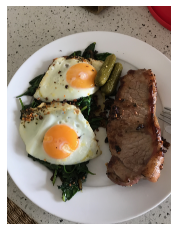

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = preprocessing.image.load_img('/content/03-steak.jpeg')
plt.imshow(steak)
plt.axis(False)

--2021-06-15 12:47:29--  https://rezepte.genius.tv/wp-content/uploads/2020/09/Pizza-titel.jpg
Resolving rezepte.genius.tv (rezepte.genius.tv)... 185.3.234.108
Connecting to rezepte.genius.tv (rezepte.genius.tv)|185.3.234.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347597 (339K) [image/jpeg]
Saving to: ‘Pizza-titel.jpg.1’

Pizza-titel.jpg.1   100%[===================>] 339.45K   557KB/s    in 0.6s    

2021-06-15 12:47:31 (557 KB/s) - ‘Pizza-titel.jpg.1’ saved [347597/347597]



(-0.5, 599.5, 399.5, -0.5)

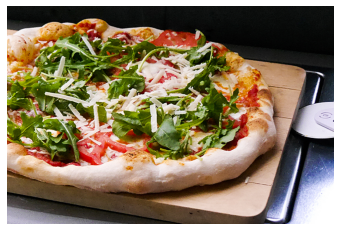

In [ ]:
!wget https://rezepte.genius.tv/wp-content/uploads/2020/09/Pizza-titel.jpg
steak = preprocessing.image.load_img('/content/Pizza-titel.jpg')
plt.imshow(steak)
plt.axis(False)

Prediction: sushi


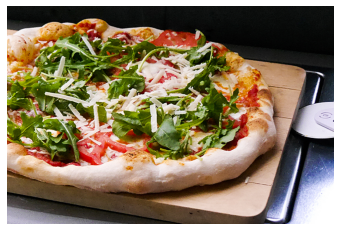

In [ ]:
load_and_pred(model_3, '/content/Pizza-titel.jpg', class_names = classes_names)

Prediction: steak


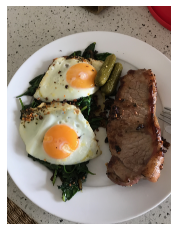

In [ ]:
load_and_pred(model_3, '/content/03-steak.jpeg', class_names = classes_names)

### Plot Confusion Matrix

In [ ]:
#y_pred and y_test should be formated as a vector
import itertools
def plot_confusion_matrix(y_pred, y_test, figsize = (10, 10), classes = False, text_size = 10):
  # Create the confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(20)
  ax.yaxis.label.set_size(20)
  ax.title.set_size(20)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [ ]:
preds = model_3.predict(test_data[1][0])

In [ ]:
preds = np.array(tf.argmax(preds, axis = 1))

In [ ]:
preds

array([1, 1, 0, 9, 2, 5, 4, 1, 3, 1, 0, 0, 0, 1, 5, 1, 9, 6, 5, 5, 4, 0,
       8, 7, 6, 1, 9, 5, 5, 8, 3, 1])

In [ ]:
y_test = np.array(tf.argmax(test_data[1][1], axis = 1))

In [ ]:
y_test

array([1, 0, 7, 9, 9, 5, 5, 8, 3, 9, 0, 0, 6, 4, 8, 1, 8, 6, 5, 1, 6, 0,
       8, 2, 3, 5, 1, 5, 5, 0, 3, 9])

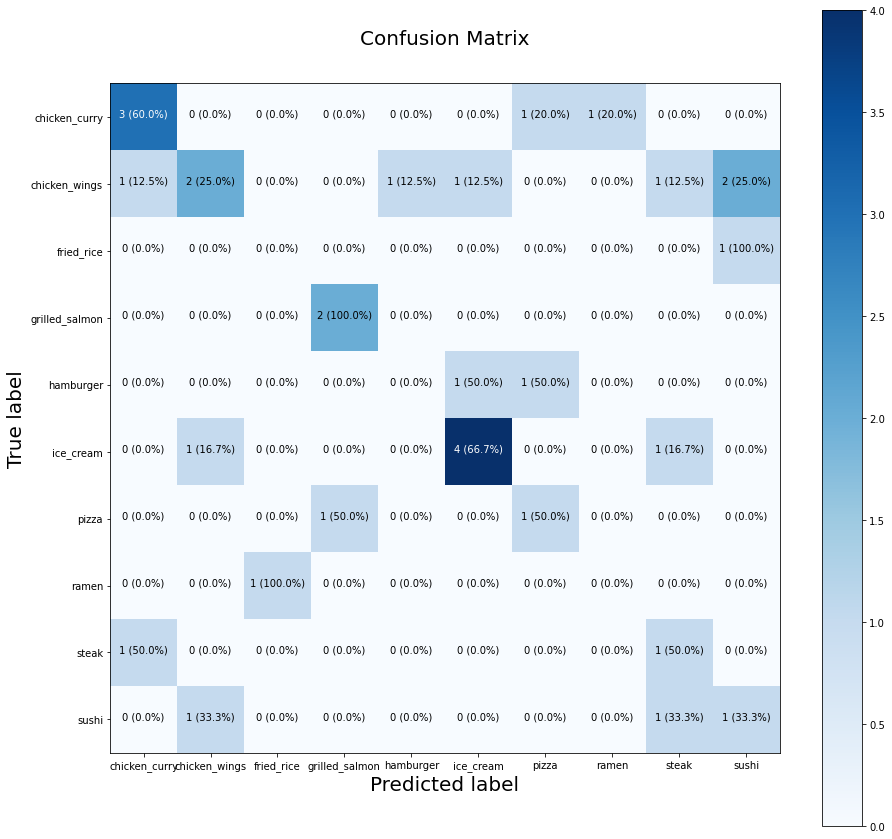

In [ ]:
plot_confusion_matrix(y_test, preds, figsize = (15,15), classes = list(classes_names))